#  ANALYZING THE TIME.  

The next graphics will to analize   propose to analyze the timing. 
And also, I will compute the errors.

In [28]:
# Import the necessary packages 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import scipy.cluster.hierarchy as shc
#%matplotlib widget
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pickle
import json
import time

In [29]:
"""
25microns0psInner200microns50psOuter_test.txt
25microns0psInner200microns50psOuter_train.txt
25microns75psInner25microns75psOuter_test.txt
25microns75psInner25microns75psOuter_train.txt
55microns0psInner55microns0psOuter_test.txt
55microns0psInner55microns0psOuter_train.txt
55microns100psInner200microns50psOuter_test.txt
55microns100psInner200microns50psOuter_train.txt
55microns50psInner55microns50psOuter_test.txt
55microns50psInner55microns50psOuter_train.txt
EVENT
55microns50psInner55microns50psOuter_EventNumber.txt
"""
# You cannot speak me, because you think about me that I am a maniatics
df = pd.DataFrame()
df = pd.read_csv('data2/55microns50psInner55microns50psOuter_EventNumber.txt', sep=' ')
#df = pd.read_csv('data/Data_test/RAMPData55microns50psInner200microns50psOuter_train.txt', sep=' ')

In [30]:
def Split_frac(df, frac):
    '''
    df: Dataframe that will be split
    
    frac: Fraction of data you want to run your algorithm over 
    '''
    # Maximum number of tracks 
    m = df['particle_id'].max()  
    split = int(frac*m)
    
    # Want to train algorithm using df1 and cross-validate using df2
    df1 = df.query(f'particle_id<{split}')
    df2 = df.query(f'particle_id>{split}')
    return df1, df2
def Split_N(df, n):
    '''
    n: Number of samples you want to split into 
    '''
    grouped = df.groupby(['particle_id'])
    group = np.array_split(grouped, n)
    df = []
    for j in range(n):
        # array of dataframes containing the split of the original data
        df.append(pd.concat([pd.DataFrame(group[j][i][1]) for i in range (len(group[j]))]))
    
    return df

def correct_time(hit_time, x, y, z):
    c = 0.299792458 # millimeters per picosecond
    travel_time = np.sqrt(x*x + y*y + z*z)/c
    return hit_time - travel_time    

#df_train = Split_N(df, 3)
#df,_ = Split_frac(df,0.004)
df.shape

df['t_c'] = correct_time(df['t'], df['x'], df['y'], df['z'])
df['phi']   = np.arctan2(df['x'], df['y'])                        
#  df['t_c']   = correct_time(df['t'], df['x'], df['y'], df['z'])   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f6cbd47f0>]],
      dtype=object)

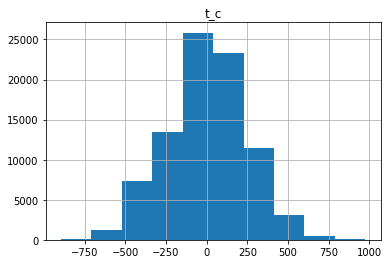

In [31]:
df.hist("t_c")

In [32]:
modules = []
z_modules = [-277.0, -252.0, -227.0, -202.0, -132.0, -62.0, -37.0, -12.0, 13.0, 38.0, 63.0, 88.0, 113.0, 138.0, 163.0, 188.0, 213.0, 238.0, 263.0, 325.0, 402.0, 497.0, 616.0, 661.0, 706.0, 751.0]
sigma_z = 0.5
for z_m in z_modules:  
    #print(sigma_z)
    mod = df.query(f" {z_m} - {sigma_z} <= z <= {z_m} + {sigma_z}").copy(deep=True)
    mod['z_mod'] = z_m
    #mod.loc[mod.index.values, "z_mod"] = z_m
    #mod.loc[mod.index.values, "used"]  = False

    # IMPORTANT        
    mod = mod.sort_values('phi', ascending=True)
    #print("Index ", mod['t_c'])
    modules.append(mod)

In [33]:
def time_difference_on_modules(modules):
    M = len(modules)
    #plt.figure(figsize=(1,1))
    for i, j in [ (i,i+1) for i in range(M-1)  ]:
        plt.figure(figsize=(2,2))
        a = modules[i][['t_c','particle_id', "x", "y","z" ]]
        b = modules[j][['t_c', 'particle_id', "x", "y","z" ]]
        a_columns    = [ s+"1" for s in a.columns.values ]  
        a.columns    = a_columns                             
        a_columns[1] = 'particle_id'                        
        a.columns    = a_columns 
        b_columns    = [ s+"2" for s in b.columns.values ]  
        b.columns    = b_columns                            
        b_columns[1] = 'particle_id'                      
        b.columns    = b_columns 

        result = pd.concat( [a, b], axis=1, sort=False )
        result = pd.merge(a, b, on='particle_id')
        substraction = result['t_c1'] - result['t_c2']
        substraction = substraction.to_numpy()
        plt.xlabel("time difference between two modules")
        plt.hist(substraction)
        #substraction.hist()
        print(f" std of substraction between M{i} and M{j}: substraction.to_numpy().std()" )
    #plt.show()

 std of substraction between M0 and M1: substraction.to_numpy().std()
 std of substraction between M1 and M2: substraction.to_numpy().std()
 std of substraction between M2 and M3: substraction.to_numpy().std()
 std of substraction between M3 and M4: substraction.to_numpy().std()
 std of substraction between M4 and M5: substraction.to_numpy().std()
 std of substraction between M5 and M6: substraction.to_numpy().std()
 std of substraction between M6 and M7: substraction.to_numpy().std()
 std of substraction between M7 and M8: substraction.to_numpy().std()
 std of substraction between M8 and M9: substraction.to_numpy().std()
 std of substraction between M9 and M10: substraction.to_numpy().std()
 std of substraction between M10 and M11: substraction.to_numpy().std()
 std of substraction between M11 and M12: substraction.to_numpy().std()
 std of substraction between M12 and M13: substraction.to_numpy().std()
 std of substraction between M13 and M14: substraction.to_numpy().std()
 std of sub

/afs/cern.ch/work/p/ppayemam/miniconda/envs/ramp_velo_challenge/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


 std of substraction between M23 and M24: substraction.to_numpy().std()
 std of substraction between M24 and M25: substraction.to_numpy().std()


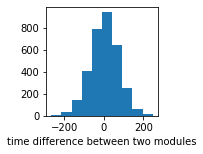

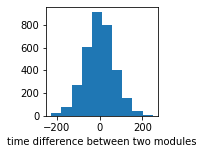

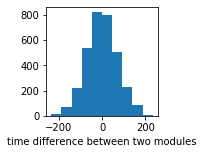

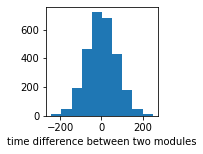

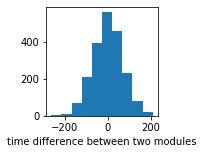

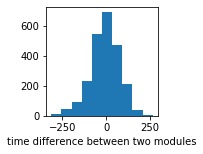

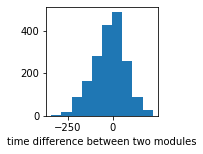

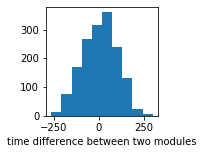

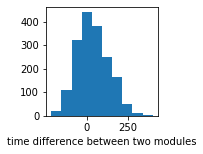

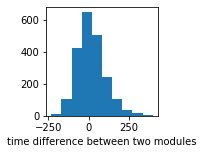

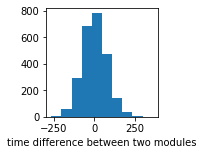

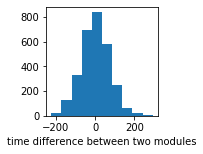

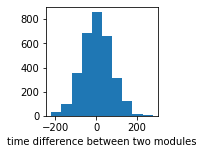

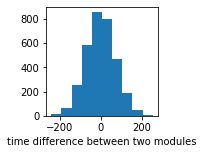

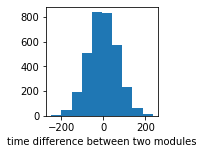

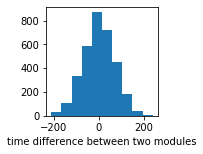

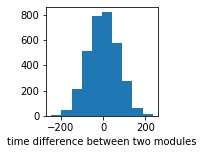

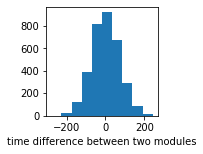

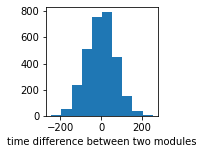

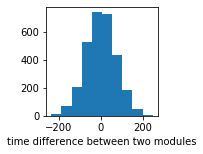

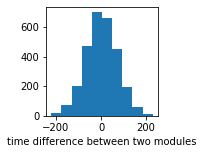

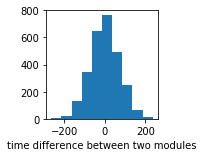

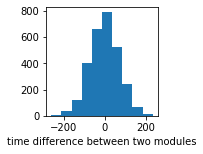

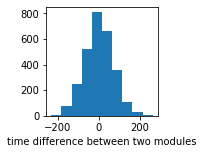

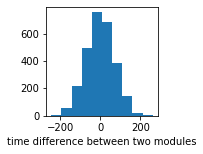

In [34]:
time_difference_on_modules(modules)

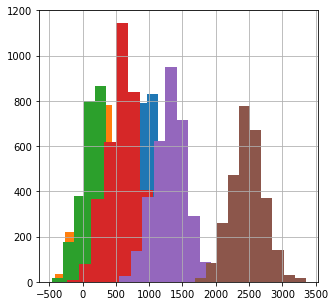

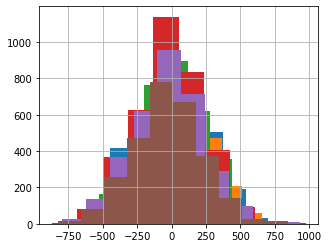

In [35]:
def time_distribution_on_modules(modules):
    M = len(modules)
    plt.figure(figsize=(5,5))
    for i in range(0, M, 5)  :
        modules[i]['t'].hist() 
    plt.show()        
    
    #M = len(modules)
    plt.figure(figsize=(5,4))
    for i in range(0, M, 5)  :
        modules[i]['t_c'].hist() 
    plt.show()        

time_distribution_on_modules(modules)



In [40]:
df['dt'].unique()

array([50])

# Another kind of substraction 
It basically not depend on the initial position. 

In [36]:
def correct_time_between_two_hits_without_time(result):
    # (x1, y1, z1, x2, y2, z2)
    c = 0.299792458 # millimeters per picosecond 
    x1, y1, z1, x2, y2, z2 = result['x1'], result['x2'], result['y1'], result['y2'], result['z1'], result['z2']  
    dx = x2-x1
    dy = y2-y1
    dz = z2-z1
    time_difference = np.sqrt(dx*dx + dy*dy + dz*dz)/c
    #return time_difference
    return x2-x1 

In [37]:
time_substraction = correct_time_between_two_hits_without_time(result)

NameError: name 'result' is not defined

In [ ]:
time_substraction.hist()
print("std :", time_substraction.to_numpy().std() )

# Here I am trying to reflex the 2Dimensional Plot.    The suggestion of MISHA
But it is incorrect. This part of the code is incomplete.

In [ ]:
for i in t1 :
    tmp = []
    for j in t2:
        tmp.append(int(abs(i-j)))

        harvest.append(tmp)    
        # print(i,j)
#print(harvest)

fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
"""
# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")
"""
ax.set_title("Distribution of t1-t2 for a two consequtive modules")
fig.tight_layout()
plt.show()